---
title: Multi-Objective Optimization and Pareto Front
author: Kunlei Lian
date: 04/02/2024
categories:
  - Python
  - Multi-objective optimization
jupyter: 'blog'
format:
  html:
    code-line-numbers: true
    code-overflow: wrap
    code-block-bg: true
    code-block-border-left: true
    highlight-style: Arrow
---

I recently came across a multi-objective optimization problem at work and I need to identify the Pareto front - the set of non-dominating solutions among all the candidate solutions.
I used to study multi-objective optimization problems and algorithms in my Ph.D. years, it is nice to actually use it in my work.
In this post, I will explain some key concepts and some useful techniques:

- Multi-objective optimization
- Pareto dominance and Pareto front
- Identify Pareto front in Python

## Multi-Objective Optimization

Multi-objective optimization is an area of mathematical optimization that deals with problems involving more than one objective function to be optimized simultaneously. Each objective function may represent a different criterion, and these criteria often conflict with each other. The goal in multi-objective optimization is not to find a single solution that optimizes a single criterion, but rather to find solutions that achieve a satisfactory balance among all the criteria.

Multi-objective optimization is used in many fields where trade-offs between two or more outcomes must be negotiated, such as:

- Engineering Design: Optimizing design parameters for competing objectives like cost, performance, and safety.
- Economics and Finance: Balancing return and risk in portfolio management.
- Energy Management: Managing the trade-offs between cost, environmental impact, and efficiency.
- Logistics and Transportation: Optimizing routes and schedules to minimize costs and time while maximizing customer satisfaction.

The main challenges in multi-objective optimization include handling the complexity and computational cost of finding multiple optimal solutions, choosing appropriate methods and algorithms that fit the specific characteristics of the problem, and effectively assisting decision-makers in selecting from among the set of optimal solutions based on their preferences and the trade-offs they are willing to make.

## Pareto Dominance and Pareto Front

A solution $x$ is said to Pareto dominate another solution $y$ if and only if:

1. $x$ is no worse than $y$ in all objectives, and
2. $x$ is strictly better than $y$ in at least one objective.

In mathematical terms, considering a minimization problem with objectives $f_1, f_2, \cdots, f_k$:

- $x$ Pareto dominates $y$ if for all $i \in \{1, 2, \cdots, k\}, f_i(x) \leq f_i(y)$ and there exists at least one $j$ such that $f_i(x) < f_i(y)$.

This concept allows decision-makers to sift through multiple feasible solutions to identify those that are not dominated by any other, helping them focus on the most promising solutions.

The **Pareto front** consists of all solutions that are not Pareto dominated by any other solution. These solutions are also known as Pareto optimal solutions. The Pareto front is particularly useful because it contains all possible trade-offs that a decision-maker can consider, providing a clear visualization of how one can improve one objective only at the expense of another.

## Identify Pareto Front in Python

There is a package, `paretoset`, that could help us identify all the non-dominating solutions in multi-objective optimization.
The installation is straightforward:

```{python}
pip install paretoset
```

To illustrate the usage of this package, we will use a bi-objective optimization problem as an example.
Suppose we identified a list of candidate solutions with corresponding objective values for this problem, as shown in the data frame below:

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'obj1': [0.5, 1.0, 2, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 1, 2, 3, 4, 5, 0.5, 1, 1.5, 2, ], 
                   'obj2': [5.8, 5.5, 5, 4.8, 4.5, 4.0, 3.5, 2.6, 1.0, 5, 4, 3, 2, 0.5, 2, 4, 2.5, 2, ]})
df

,obj1,obj2
0,0.5,5.8
1,1.0,5.5
2,2.0,5.0
3,2.5,4.8
4,3.0,4.5
5,3.5,4.0
6,4.0,3.5
7,5.0,2.6
8,6.0,1.0
9,1.0,5.0


Putting all the solutions in a plot creates a graph as in below:

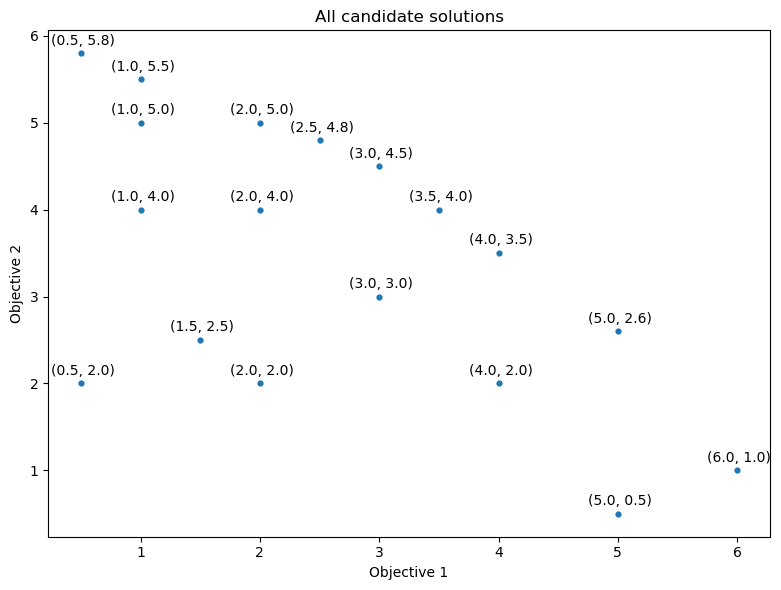

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(df['obj1'], df['obj2'], s=12)
ax.set_xlabel('Objective 1')
ax.set_ylabel('Objective 2')
ax.set_title('All candidate solutions')

for idx, row in df.iterrows():
    ax.annotate(f'({row['obj1']}, {row['obj2']})', (row['obj1']-0.25, row['obj2'] + 0.1))

fig.tight_layout()

Assume we aim to maximize both objectives, it is clear that some solutions are *dominated* by other solutions.
For example, the solution (0.5, 2.0) on the left is worse than the solution (2.0, 4.0) in both objectives.

To use the `paretoset` package, simply pass all the objectives and their corresponding objective sense to the `paretoset` class.
The result will indicate which solution is a non-dominated solution.

In [49]:
from paretoset import paretoset

df['efficient'] = paretoset(df[['obj1', 'obj2']],
                            sense=('max', 'max'))

In [50]:
df

,obj1,obj2,efficient
0,0.5,5.8,True
1,1.0,5.5,True
2,2.0,5.0,True
3,2.5,4.8,True
4,3.0,4.5,True
5,3.5,4.0,True
6,4.0,3.5,True
7,5.0,2.6,True
8,6.0,1.0,True
9,1.0,5.0,False


To visualize the resulting non-dominated solutions (among all the solutions), we mark them using a different color (yellow) from the dominated solutions (purple) in the graph below.

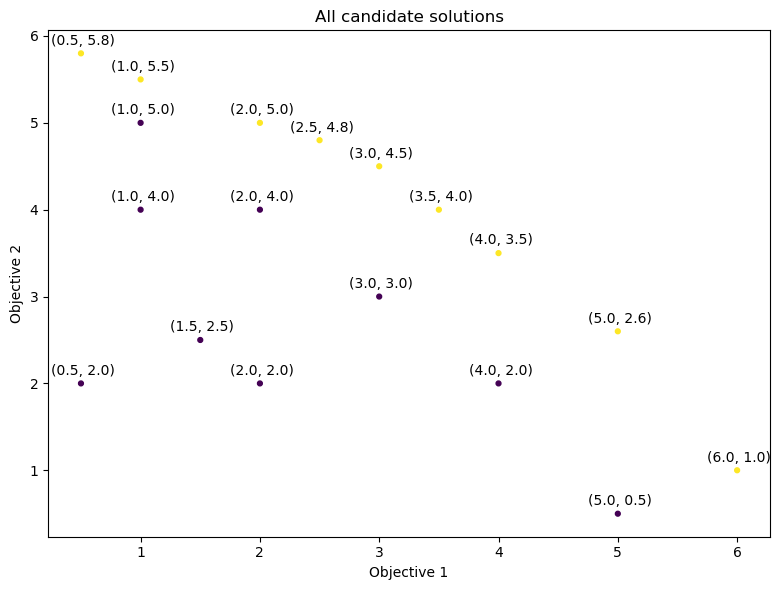

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(df['obj1'], df['obj2'], s=12, c=df['efficient'])
ax.set_xlabel('Objective 1')
ax.set_ylabel('Objective 2')
ax.set_title('All candidate solutions')

for idx, row in df.iterrows():
    ax.annotate(f'({row['obj1']}, {row['obj2']})', (row['obj1']-0.25, row['obj2'] + 0.1))

fig.tight_layout()